In [1]:
import numpy as np
import pandas as pd

In [3]:
data= pd.read_csv("Mall_Customers.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [9]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [20]:
wcss = []
for i in range(1, 11):
   
    kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)

    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


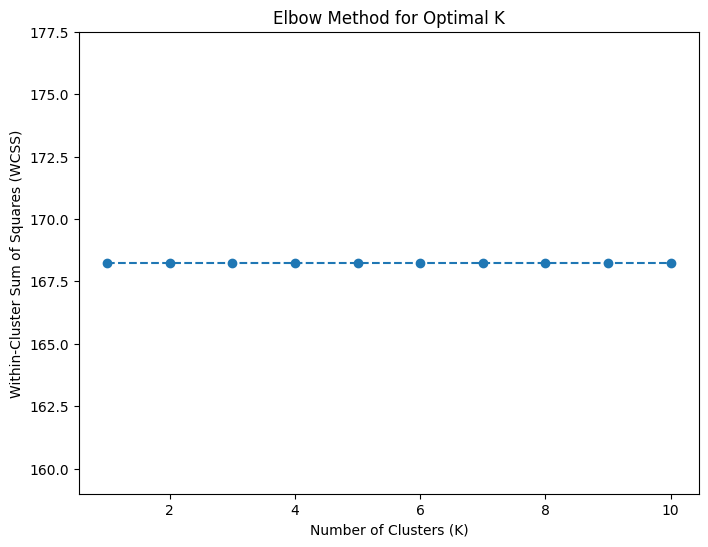

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [22]:
optimal_k = 5

In [24]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)

data['Cluster'] = kmeans.fit_predict(scaled_features)

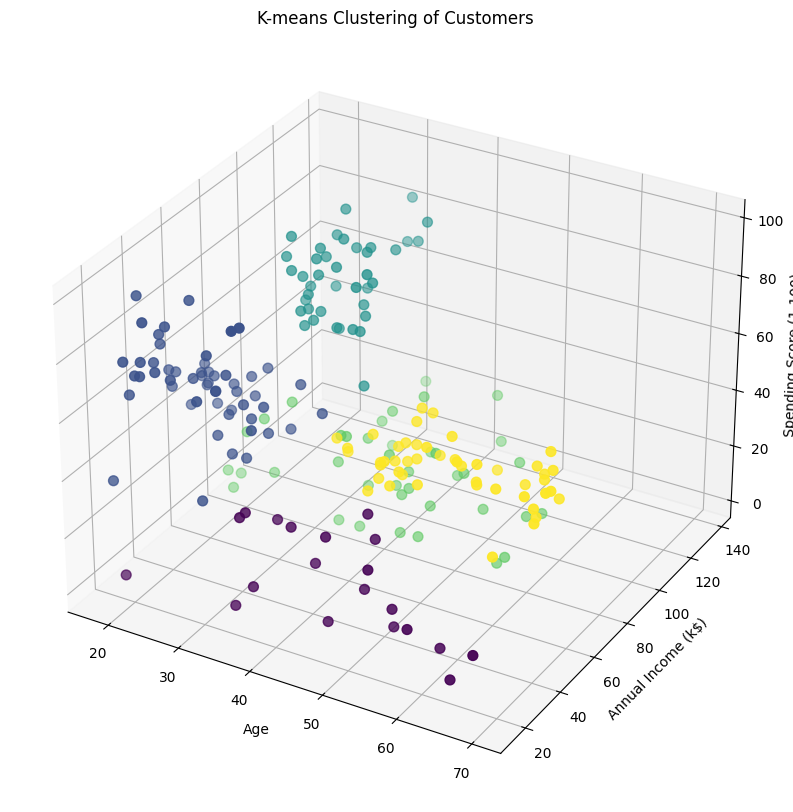

In [25]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('K-means Clustering of Customers')
plt.show()